<a href="https://colab.research.google.com/github/Ch256981/IMLP347/blob/main/HW4_Ko_I_Hung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BUDT 758J - HW4
## I-Hung Ko

In [5]:
# read Fashion MNist dataset
from tensorflow import keras

(data_train, out_train), (data_test, out_test) = keras.datasets.fashion_mnist.load_data()
data_train.shape, out_train.shape, data_test.shape, out_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## Preprocessing

In [2]:
# transformation
in_train = data_train / 255.0
in_test = data_test / 255.0
in_train.min(), in_train.max(), in_test.min(), in_test.max()

(0.0, 1.0, 0.0, 1.0)

In [3]:
# EDA on out
#out_train.min(), out_train.max(), out_test.min(), out_test.max()
import numpy as np
np.unique(out_train), np.unique(out_test)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [4]:
# enumerate out classes
class_names = {
0	: 'T-shirt/top',
1	: 'Trouser',
2 :	'Pullover',
3	: 'Dress',
4 :	'Coat',
5	: 'Sandal',
6	: 'Shirt',
7	: 'Sneaker',
8	: 'Bag',
9	: 'Ankle boot' }
print(class_names)

{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


## Training Set

In [6]:
# define function to display images
import math
import matplotlib.pyplot as plt

def plot(images, labels, predictions=None):
  num_rows = int(input('How many rows of training images (in 10 images per row) would you like to review?'))
  total_images = min(num_rows * 10, len(images))
  n_cols = 10
  n_rows = math.ceil(total_images / n_cols)
  fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 2))
  if predictions is None:
    predictions = [None] * len(labels)
  axes = axes.flatten()
  for index in range(total_images):
     ax = axes[index]
     ax.imshow(images[index], cmap=plt.cm.binary)
     ax.set_xticks([])
     ax.set_yticks([])
     ax.set_title(class_names[labels[index]]) if class_names is not None else labels[index]
     if predictions[index] is not None:
       ax.set_xlabel(class_names[predictions[index]] if class_names is not None else predictions[index])

How many rows of training images (in 10 images per row) would you like to review?3


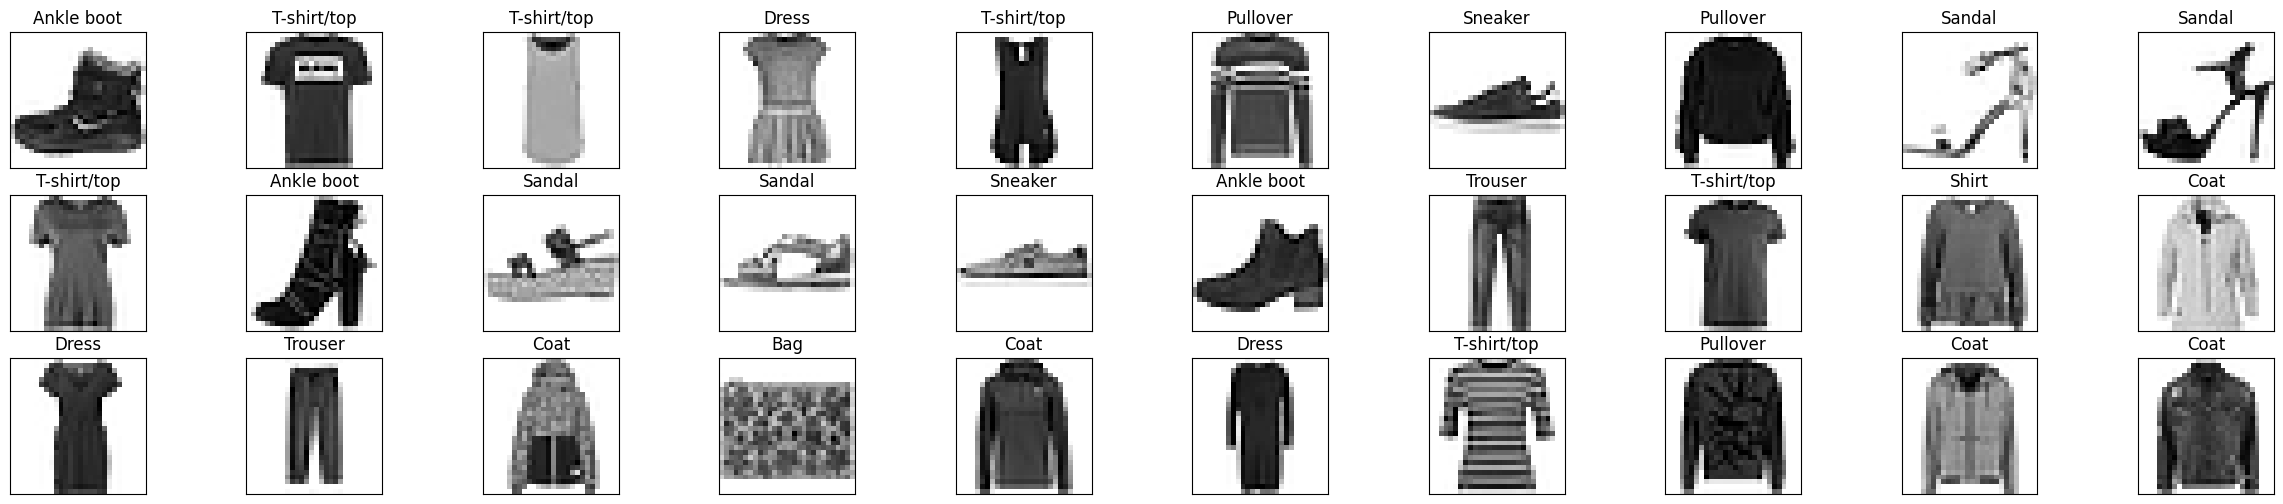

In [7]:
# display 10 * rows images in training set
plot(in_train, out_train)

## Model in Keras

In [39]:
model = keras.Sequential(layers=[
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(500, activation='sigmoid'),
  keras.layers.Dense(10, activation='softmax')
  ])
# https://keras.io/api/optimizers/
# https://www.tensorflow.org/api_docs/python/tf/keras/losses
model.compile(optimizer='adam',
       loss='sparse_categorical_crossentropy',
       metrics=['accuracy'])
history = model.fit(in_train, out_train, batch_size=60, epochs=2, validation_split=0.2)

Epoch 1/2
800/800 [==============================] - 8s 9ms/step - loss: 0.5523 - accuracy: 0.8062 - val_loss: 0.4383 - val_accuracy: 0.8457
Epoch 2/2
800/800 [==============================] - 6s 8ms/step - loss: 0.4139 - accuracy: 0.8501 - val_loss: 0.3938 - val_accuracy: 0.8591


In [40]:
model1 = keras.Sequential(layers=[
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(300, activation='sigmoid'),
  keras.layers.Dense(10, activation='softmax')
  ])
# https://keras.io/api/optimizers/
# https://www.tensorflow.org/api_docs/python/tf/keras/losses
model1.compile(optimizer='adam',
       loss='sparse_categorical_crossentropy',
       metrics=['accuracy'])
history1 = model1.fit(in_train, out_train, batch_size=60, epochs=2, validation_split=0.2)

Epoch 1/2
800/800 [==============================] - 7s 8ms/step - loss: 0.5687 - accuracy: 0.8058 - val_loss: 0.4568 - val_accuracy: 0.8244
Epoch 2/2
800/800 [==============================] - 5s 6ms/step - loss: 0.4145 - accuracy: 0.8505 - val_loss: 0.4119 - val_accuracy: 0.8534


In [41]:
model2 = keras.Sequential(layers=[
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(500, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
  ])
# https://keras.io/api/optimizers/
# https://www.tensorflow.org/api_docs/python/tf/keras/losses
model2.compile(optimizer='adam',
       loss='sparse_categorical_crossentropy',
       metrics=['accuracy'])
history2 = model2.fit(in_train, out_train, batch_size=60, epochs=2, validation_split=0.2)

Epoch 1/2
800/800 [==============================] - 7s 8ms/step - loss: 0.5034 - accuracy: 0.8223 - val_loss: 0.4328 - val_accuracy: 0.8478
Epoch 2/2
800/800 [==============================] - 7s 9ms/step - loss: 0.3711 - accuracy: 0.8648 - val_loss: 0.3648 - val_accuracy: 0.8657


In [42]:
model3 = keras.Sequential(layers=[
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(500, activation='sigmoid'),
  keras.layers.Dense(10, activation='softmax')
  ])
# https://keras.io/api/optimizers/
# https://www.tensorflow.org/api_docs/python/tf/keras/losses
model3.compile(optimizer='adam',
       loss='sparse_categorical_crossentropy',
       metrics=['accuracy'])
history3 = model3.fit(in_train, out_train, batch_size=88, epochs=5, validation_split=0.2)

Epoch 1/5
546/546 [==============================] - 6s 10ms/step - loss: 0.5769 - accuracy: 0.8000 - val_loss: 0.4450 - val_accuracy: 0.8408
Epoch 2/5
546/546 [==============================] - 6s 11ms/step - loss: 0.4243 - accuracy: 0.8483 - val_loss: 0.4176 - val_accuracy: 0.8482
Epoch 3/5
546/546 [==============================] - 5s 9ms/step - loss: 0.3859 - accuracy: 0.8625 - val_loss: 0.3988 - val_accuracy: 0.8543
Epoch 4/5
546/546 [==============================] - 6s 12ms/step - loss: 0.3618 - accuracy: 0.8694 - val_loss: 0.3646 - val_accuracy: 0.8684
Epoch 5/5
546/546 [==============================] - 5s 9ms/step - loss: 0.3395 - accuracy: 0.8777 - val_loss: 0.3442 - val_accuracy: 0.8750


In [43]:
model4 = keras.Sequential(layers=[
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(500, activation='sigmoid'),
  keras.layers.Dense(10, activation='softmax')
  ])
# https://keras.io/api/optimizers/
# https://www.tensorflow.org/api_docs/python/tf/keras/losses
model4.compile(optimizer='adam',
       loss='sparse_categorical_crossentropy',
       metrics=['accuracy'])
history4 = model4.fit(in_train, out_train, batch_size=60, epochs=2, validation_split=0.1)

Epoch 1/2
900/900 [==============================] - 8s 8ms/step - loss: 0.5418 - accuracy: 0.8100 - val_loss: 0.4203 - val_accuracy: 0.8487
Epoch 2/2
900/900 [==============================] - 7s 7ms/step - loss: 0.4076 - accuracy: 0.8538 - val_loss: 0.3818 - val_accuracy: 0.8570


## Test Set

In [44]:
model.evaluate(in_test, out_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4230 - accuracy: 0.8476


[0.4230293035507202, 0.847599983215332]

In [45]:
probs = model.predict(in_test)
preds = probs.argmax(axis=1)
preds

313/313 [==============================] - 1s 4ms/step


array([9, 2, 1, ..., 8, 1, 5])

In [46]:
val_accuracy = history.history['val_accuracy']
val_accuracy1 = history1.history['val_accuracy']
val_accuracy2 = history2.history['val_accuracy']
val_accuracy3 = history3.history['val_accuracy']
val_accuracy4 = history4.history['val_accuracy']

val_accuracies = [
    history.history['val_accuracy'][-1],
    history1.history['val_accuracy'][-1],
    history2.history['val_accuracy'][-1],
    history3.history['val_accuracy'][-1],
    history4.history['val_accuracy'][-1]
]

best_model_index = np.argmax(val_accuracies)

test_metrics = [model, model1, model2, model3, model4][best_model_index].evaluate(in_test, out_test)

print(f"Test Loss: {test_metrics[0]}")
print(f"Test Accuracy: {test_metrics[1]}")

313/313 [==============================] - 1s 3ms/step - loss: 0.3739 - accuracy: 0.8656
Test Loss: 0.3739144802093506
Test Accuracy: 0.8655999898910522


In [47]:
# define function to display images
import math
import matplotlib.pyplot as plt
import numpy as np

def plot(images, labels, class_names, predictions=None):
  num_rows = int(input('How many rows of randomly selected test images (in 10 images per row) would you like to review?'))
  n_cols = 10
  total_images = num_rows * n_cols
  indices = np.random.choice(len(images), total_images, replace=False)
  selected_images = images[indices]
  selected_labels = labels[indices]
  selected_predictions = predictions[indices] if predictions is not None else [None] * total_images
  n_rows = math.ceil(total_images / n_cols)
  fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 2))
  axes = axes.flatten()
  for index in range(total_images):
     ax = axes[index]
     ax.imshow(images[index], cmap=plt.cm.binary)
     ax.set_xticks([])
     ax.set_yticks([])
     ax.set_title(class_names[labels[index]]) if class_names is not None else str(selected_labels[index])
     if selected_predictions[index] is not None:
       ax.set_xlabel(class_names[selected_predictions[index]] if class_names is not None else str(selected_predictions[index]))

How many rows of randomly selected test images (in 10 images per row) would you like to review?3


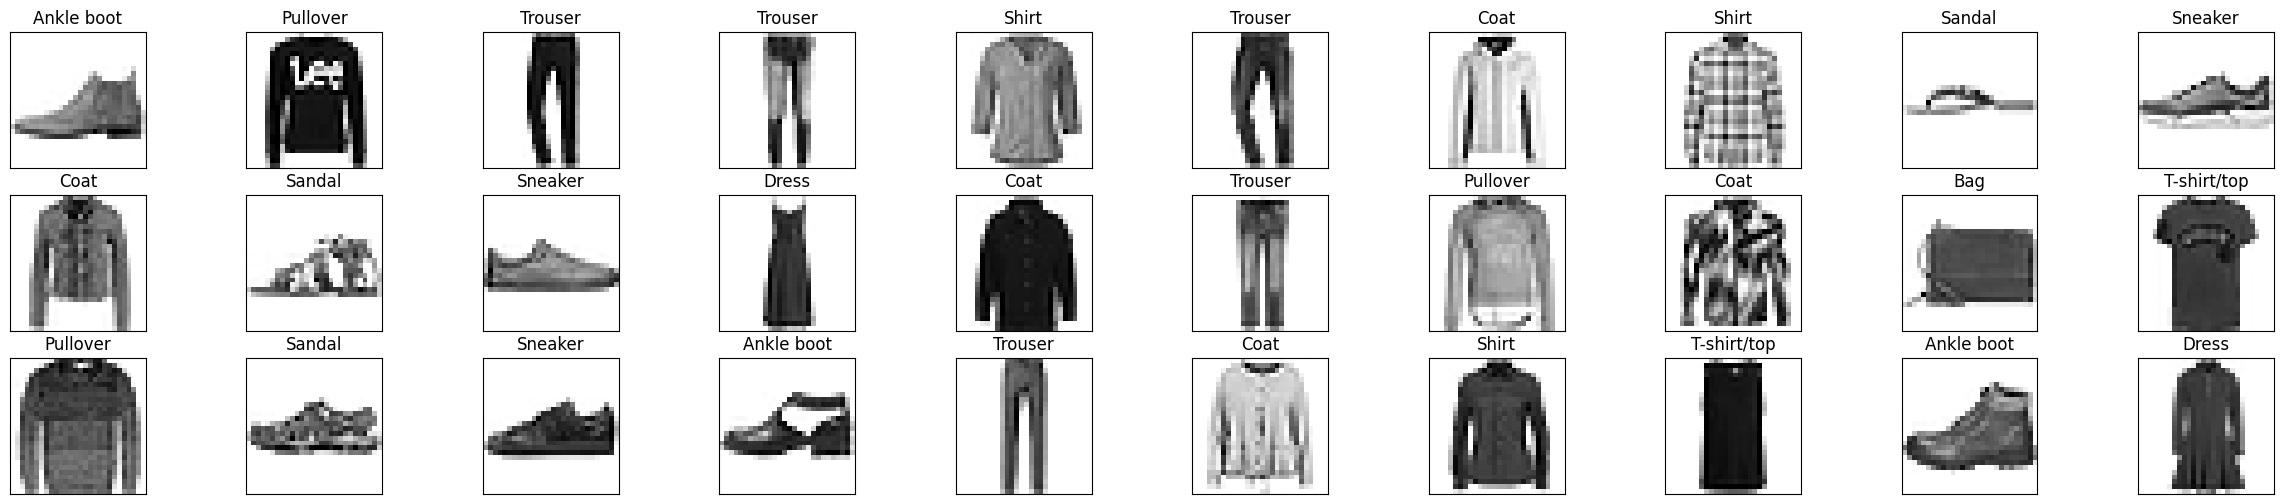

In [48]:
# display 10 * rows images in test set
plot(in_test, out_test, class_names)

## Application

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import widgets, interact, Layout
img_idx_slider = widgets.IntSlider(value=0, min=0, max=len(in_test) - 1,
                                   description='Image Index',
                                   layout=Layout(width='100%'))
@interact(index=img_idx_slider)
def visualize_prediction(index=0):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.imshow(in_test[index], cmap=plt.cm.binary)
    ax1.set_title(f'Label: {class_names[out_test[index]]}')
    ax1.xaxis.tick_top()
    ax1.set_xlabel(f'Predict: {class_names[preds[index]]}')
    ax1.set_ylabel('Pixel Location Index')
    ax1.set_xticks(range(28))
    ax1.set_yticks(range(28))
    ax1.tick_params(axis='x', labelrotation=90)
    bar = sns.barplot(y=[class_names[ind] for ind in range(10)],
                      x=probs[index]*100)
    bar.set_xlim(0, 100)
    bar.set_xlabel('Probability (%)')
    bar.set_ylabel('Prediction Label')
    bar.set_title('Prediction Probabilities')
    fig.tight_layout()
    plt.show()

interactive(children=(IntSlider(value=0, description='Image Index', layout=Layout(width='100%'), max=9999), Ou…